this script plots yearly publication reduction after removing pulications that are funded by a specific country. The inputs are:
- raw_path: the number of publication in discipline of countries
- filter_path: same with above but without pubs that funded by specific country
- flag_path: file contains country name and iso-3 code

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text
import funding.core

## Parameters

In [2]:
cntry_full_path="../../data/nf_folder/Data/DerivedData/Derived/cntry_author_full.csv"
cntry_filter_path="../../data/nf_folder/Data/DerivedData/Derived/dep-FundExchange/pub_no_foreign_top20.csv"
flag_path='../../data/nf_folder/Data/AdditionalData/country_WoS_ECI_WB_flags.tsv'

plot_path='../../data/nf_folder/Figs/dep-FundExchange/pub_reduction_bytop10.pdf'

In [3]:
# Parameters
cntry_full_path = "../data/NationalFunding/Data/simulated_data/Data/DerivedData/Derived/cntry_author_full.csv"
cntry_filter_path = "../data/NationalFunding/Data/simulated_data/Data/DerivedData/Derived/dependence/pub_noforeign_fund_top20.csv"
flag_path = "../data/NationalFunding/Data/simulated_data/Data/AdditionalData/country_WoS_ECI_WB_flags.tsv"
plot_path = (
    "../data/NationalFunding/Data/simulated_data/Figs/Figs/pub_reduction_by_top10.pdf"
)


## Calculations

In [4]:
flag_df=pd.read_csv(flag_path,sep='\t')[['WoS','Code']]
raw_df=pd.read_csv(cntry_full_path)
raw_df = raw_df.groupby(['cntry','year'])['count'].sum().reset_index(name='raw')
filter_df=pd.read_csv(cntry_filter_path)
filter_df = filter_df.groupby(['srce_cntry','author_distinct','year'])['count'].sum().reset_index(name='filter')
filter_df = filter_df.rename(columns={'author_distinct':'cntry'})
meta=raw_df.merge(filter_df,on=['cntry','year'])
meta['p']=(meta['raw']-meta['filter'])/meta['raw']
meta=meta.merge(flag_df,left_on='srce_cntry',right_on='WoS',how='left')

In [5]:
meta=meta[meta.cntry!=meta.srce_cntry] #remove the influence of itself

## plot

/home/miaoli/conda/envs/myenv/lib/python3.8/site-packages/funding/core.py:77: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(x=xcol,y=ycol,err_style='bars',ci=95,hue='Code',data=df,ax=ax,legend=False,palette=palette)


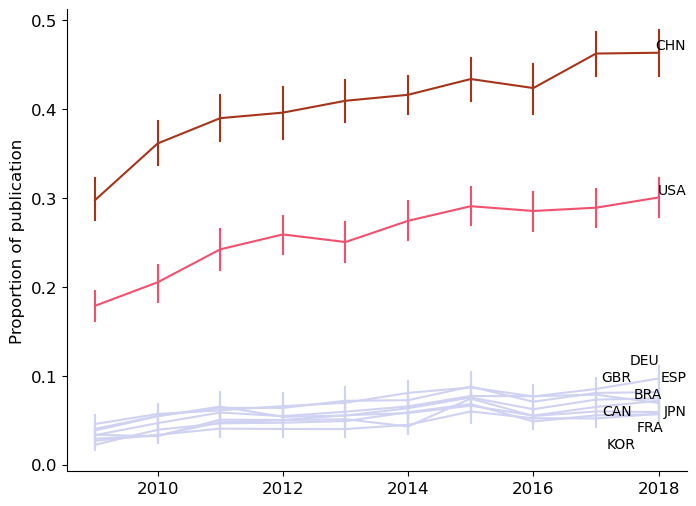

In [6]:

fig, ax=plt.subplots(figsize=(8,6))
topnlist,yvalues=funding.core.select_topn(meta,'Code','p',2018,10)
ax=funding.core.plot(meta,'year','p',ax,topnlist,yvalues,'Proportion of publication')
vals = ax.get_yticks()
#ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

plt.savefig(plot_path, bbox_inches='tight')